# INDIAN AIR QUALITY DATA ANALYSIS

In [181]:
##IMPORT LIBRARIES

import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [182]:
data = pd.read_csv('data.csv', encoding='ISO-8859-1') #import data

C:\Users\ketak\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (0) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [183]:
data.head()

,stn_code,sampling_date,state,location,agency,type,so2,no2,rspm,spm,location_monitoring_station,pm2_5,date
0,150,February - M021990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",4.8,17.4,NaN,NaN,NaN,NaN,1990-02-01
1,151,February - M021990,Andhra Pradesh,Hyderabad,NaN,Industrial Area,3.1,7.0,NaN,NaN,NaN,NaN,1990-02-01
2,152,February - M021990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",6.2,28.5,NaN,NaN,NaN,NaN,1990-02-01
3,150,March - M031990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",6.3,14.7,NaN,NaN,NaN,NaN,1990-03-01
4,151,March - M031990,Andhra Pradesh,Hyderabad,NaN,Industrial Area,4.7,7.5,NaN,NaN,NaN,NaN,1990-03-01


## DATA PREPROCESSING

In [184]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 435742 entries, 0 to 435741
Data columns (total 13 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   stn_code                     291665 non-null  object 
 1   sampling_date                435739 non-null  object 
 2   state                        435742 non-null  object 
 3   location                     435739 non-null  object 
 4   agency                       286261 non-null  object 
 5   type                         430349 non-null  object 
 6   so2                          401096 non-null  float64
 7   no2                          419509 non-null  float64
 8   rspm                         395520 non-null  float64
 9   spm                          198355 non-null  float64
 10  location_monitoring_station  408251 non-null  object 
 11  pm2_5                        9314 non-null    float64
 12  date                         435735 non-null  object 
dtyp

In [185]:
data.isna().sum()

stn_code                       144077
sampling_date                       3
state                               0
location                            3
agency                         149481
type                             5393
so2                             34646
no2                             16233
rspm                            40222
spm                            237387
location_monitoring_station     27491
pm2_5                          426428
date                                7
dtype: int64

In [186]:
data.tail()

,stn_code,sampling_date,state,location,agency,type,so2,no2,rspm,spm,location_monitoring_station,pm2_5,date
435737,SAMP,24-12-15,West Bengal,ULUBERIA,West Bengal State Pollution Control Board,RIRUO,22.0,50.0,143.0,NaN,"Inside Rampal Industries,ULUBERIA",NaN,2015-12-24
435738,SAMP,29-12-15,West Bengal,ULUBERIA,West Bengal State Pollution Control Board,RIRUO,20.0,46.0,171.0,NaN,"Inside Rampal Industries,ULUBERIA",NaN,2015-12-29
435739,NaN,NaN,andaman-and-nicobar-islands,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
435740,NaN,NaN,Lakshadweep,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
435741,NaN,NaN,Tripura,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [187]:
data.columns

Index(['stn_code', 'sampling_date', 'state', 'location', 'agency', 'type',
       'so2', 'no2', 'rspm', 'spm', 'location_monitoring_station', 'pm2_5',
       'date'],
      dtype='object')

In [188]:
data.describe()

,so2,no2,rspm,spm,pm2_5
count,401096.000000,419509.000000,395520.000000,198355.000000,9314.000000
mean,10.829414,25.809623,108.832784,220.783480,40.791467
std,11.177187,18.503086,74.872430,151.395457,30.832525
min,0.000000,0.000000,0.000000,0.000000,3.000000
25%,5.000000,14.000000,56.000000,111.000000,24.000000
50%,8.000000,22.000000,90.000000,187.000000,32.000000
75%,13.700000,32.200000,142.000000,296.000000,46.000000
max,909.000000,876.000000,6307.033333,3380.000000,504.000000


In [189]:
data.shape

(435742, 13)

##  MEAN PARAMETERS VALUES ACROSS STATES

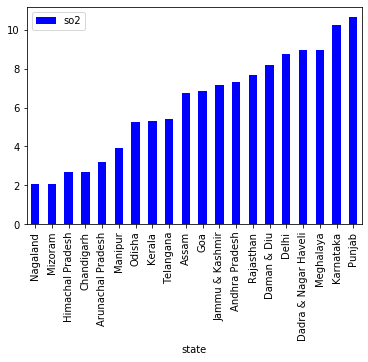

In [190]:
data[['so2','state']].groupby(["state"]).mean().sort_values(by='so2').head(20).plot.bar(color='b')
plt.show() 

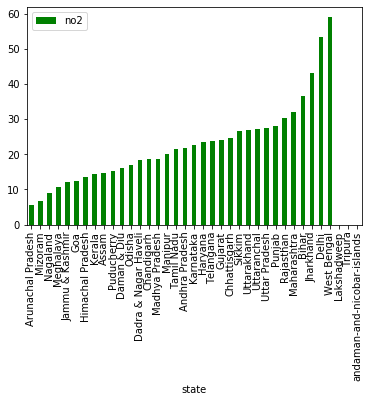

In [191]:
data[['no2','state']].groupby(["state"]).mean().sort_values(by='no2').plot.bar(color='g')
plt.show()

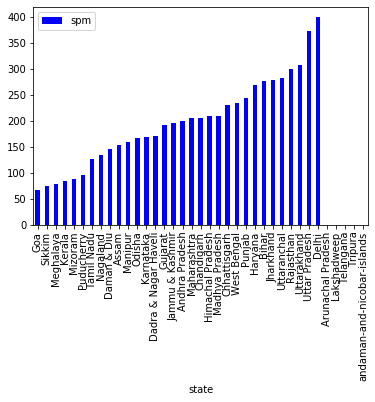

In [192]:
data[['spm','state']].groupby(["state"]).mean().sort_values(by='spm').plot.bar(color='b')
plt.show()

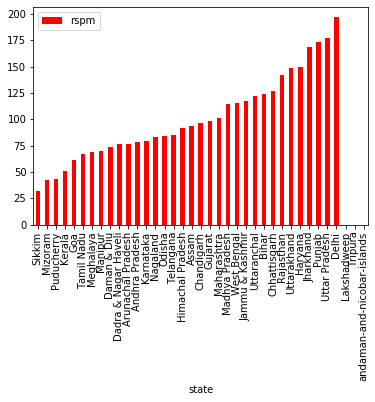

In [193]:
data[['rspm','state']].groupby(["state"]).mean().sort_values(by='rspm').plot.bar(color='r')
plt.show()

In [194]:
data.drop(['stn_code','agency','sampling_date','location_monitoring_station'],axis=1,inplace=True) 

In [195]:
data.head()

,state,location,type,so2,no2,rspm,spm,pm2_5,date
0,Andhra Pradesh,Hyderabad,"Residential, Rural and other Areas",4.8,17.4,NaN,NaN,NaN,1990-02-01
1,Andhra Pradesh,Hyderabad,Industrial Area,3.1,7.0,NaN,NaN,NaN,1990-02-01
2,Andhra Pradesh,Hyderabad,"Residential, Rural and other Areas",6.2,28.5,NaN,NaN,NaN,1990-02-01
3,Andhra Pradesh,Hyderabad,"Residential, Rural and other Areas",6.3,14.7,NaN,NaN,NaN,1990-03-01
4,Andhra Pradesh,Hyderabad,Industrial Area,4.7,7.5,NaN,NaN,NaN,1990-03-01


In [196]:
total = data.isnull().sum().sort_values(ascending=False) 

In [197]:
total.head()

pm2_5    426428
spm      237387
rspm      40222
so2       34646
no2       16233
dtype: int64

In [198]:
percent = (data.isnull().sum()/data.isnull().count()*100).sort_values(ascending=False)  #count(returns Non-NAN value)

In [199]:
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])

In [200]:
missing_data.head()

,Total,Percent
pm2_5,426428,97.862497
spm,237387,54.478797
rspm,40222,9.230692
so2,34646,7.951035
no2,16233,3.725370


## Percent missing data by feature

Text(0.5, 1.0, 'Percent missing data by feature')

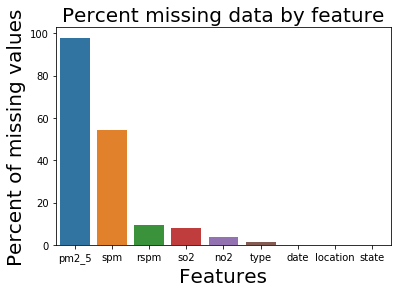

In [201]:
sns.barplot(x=missing_data.index, y=missing_data['Percent'])
plt.xlabel('Features', fontsize=20)
plt.ylabel('Percent of missing values', fontsize=20)
plt.title('Percent missing data by feature', fontsize=20)

## MEAN PARAMETERS VALUES ACROSS STATES 

In [202]:
data.groupby('state')[['spm','pm2_5','rspm','so2','no2']].mean()

,spm,pm2_5,rspm,so2,no2
state,,,,,
Andhra Pradesh,200.260378,NaN,78.182824,7.284845,21.704451
Arunachal Pradesh,NaN,NaN,76.629213,3.179104,5.469697
Assam,153.355386,NaN,93.724912,6.723263,14.793691
Bihar,276.917416,NaN,123.705176,19.381476,36.575525
Chandigarh,206.056150,NaN,96.587079,2.676986,18.619404
Chhattisgarh,231.290969,NaN,126.472399,12.846609,24.815961
Dadra & Nagar Haveli,170.545024,30.511628,76.536530,8.939587,18.293959
Daman & Diu,145.681416,27.886364,73.749431,8.192958,16.168926
Delhi,399.402088,95.113208,196.639771,8.737273,53.489147


## UNIVARIATE ANALYSIS - PARAMETERS DISTRIBUTION

C:\Users\ketak\anaconda3\lib\site-packages\numpy\lib\histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\ketak\anaconda3\lib\site-packages\numpy\lib\histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


(array([1.74232e+05, 2.30180e+04, 1.02600e+03, 6.10000e+01, 1.10000e+01,
        4.00000e+00, 2.00000e+00, 0.00000e+00, 1.00000e+00, 0.00000e+00]),
 array([   0.,  400.,  800., 1200., 1600., 2000., 2400., 2800., 3200.,
        3600., 4000.]),
 <a list of 10 Patch objects>)

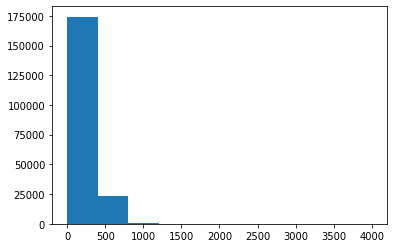

In [203]:
plt.hist(data.spm,range=(0.0,4000)) #spm

(array([4.00522e+05, 4.81000e+02, 6.40000e+01, 2.10000e+01, 6.00000e+00,
        1.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 1.00000e+00]),
 array([   0.,  100.,  200.,  300.,  400.,  500.,  600.,  700.,  800.,
         900., 1000.]),
 <a list of 10 Patch objects>)

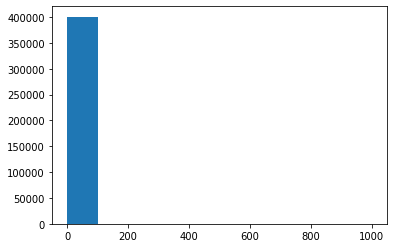

In [204]:
plt.hist(data.so2,range=(0,1000)) #so2

(array([4.16228e+05, 3.10400e+03, 1.32000e+02, 3.20000e+01, 7.00000e+00,
        3.00000e+00, 2.00000e+00, 0.00000e+00, 1.00000e+00, 0.00000e+00]),
 array([   0.,  100.,  200.,  300.,  400.,  500.,  600.,  700.,  800.,
         900., 1000.]),
 <a list of 10 Patch objects>)

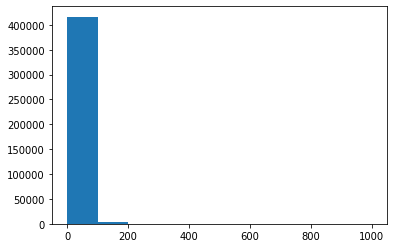

In [205]:
plt.hist(data.no2,range=(0,1000)) #no2

(array([3.95425e+05, 9.40000e+01, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 1.00000e+00]),
 array([   0.,  700., 1400., 2100., 2800., 3500., 4200., 4900., 5600.,
        6300., 7000.]),
 <a list of 10 Patch objects>)

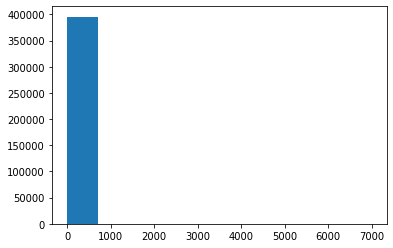

In [206]:
plt.hist(data.rspm,range=(0,7000)) #rspm

(array([8.92e+03, 3.47e+02, 3.90e+01, 7.00e+00, 0.00e+00, 1.00e+00,
        0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00]),
 array([   0.,  100.,  200.,  300.,  400.,  500.,  600.,  700.,  800.,
         900., 1000.]),
 <a list of 10 Patch objects>)

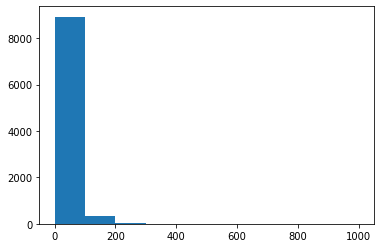

In [207]:
plt.hist(data.pm2_5,range=(0,1000)) #pm2_5

In [208]:
grp_state = data.groupby('state')

## NULL VALUES IMPUTED BY MEAN

In [209]:
def impute_mean_by_state(series):
    return series.fillna(series.mean()) 

In [210]:
data['rspm']=grp_state['rspm'].transform(impute_mean_by_state)  #fill value with mean value group by state
data['so2']=grp_state['so2'].transform(impute_mean_by_state)
data['no2']=grp_state['no2'].transform(impute_mean_by_state)
data['spm']=grp_state['spm'].transform(impute_mean_by_state)
data['pm2_5']=grp_state['pm2_5'].transform(impute_mean_by_state)

In [211]:
data.describe()

,so2,no2,rspm,spm,pm2_5
count,435739.000000,435739.000000,435739.000000,431671.000000,123689.000000
mean,10.589141,25.663170,109.680907,215.198748,48.317274
std,10.863679,18.271145,72.519399,117.470157,21.455206
min,0.000000,0.000000,0.000000,0.000000,3.000000
25%,4.800000,14.000000,59.000000,142.000000,30.729696
50%,8.000000,21.800000,93.000000,205.255823,42.204089
75%,13.000000,32.000000,142.016832,248.000000,64.890625
max,909.000000,876.000000,6307.033333,3380.000000,504.000000


In [212]:
data.isna().sum() 

state            0
location         3
type          5393
so2              3
no2              3
rspm             3
spm           4071
pm2_5       312053
date             7
dtype: int64

In [213]:
data.tail()

,state,location,type,so2,no2,rspm,spm,pm2_5,date
435737,West Bengal,ULUBERIA,RIRUO,22.0,50.0,143.0,233.506524,64.890625,2015-12-24
435738,West Bengal,ULUBERIA,RIRUO,20.0,46.0,171.0,233.506524,64.890625,2015-12-29
435739,andaman-and-nicobar-islands,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
435740,Lakshadweep,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
435741,Tripura,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


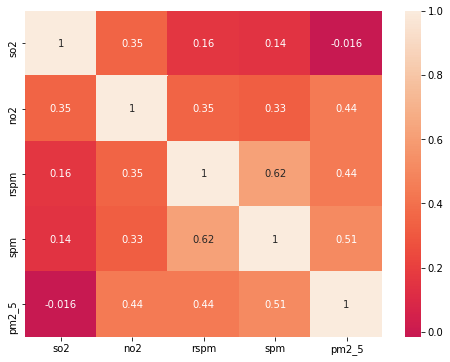

In [214]:
plt.figure(figsize = (8,6))
sns.heatmap(data.corr(), center = 0, annot = True, cmap="rocket")
plt.show()

In [76]:
df=data.copy(deep=True)
df.head()

,state,location,type,so2,no2,rspm,spm,pm2_5,date
0,Andhra Pradesh,Hyderabad,"Residential, Rural and other Areas",4.8,17.4,78.182824,200.260378,NaN,1990-02-01
1,Andhra Pradesh,Hyderabad,Industrial Area,3.1,7.0,78.182824,200.260378,NaN,1990-02-01
2,Andhra Pradesh,Hyderabad,"Residential, Rural and other Areas",6.2,28.5,78.182824,200.260378,NaN,1990-02-01
3,Andhra Pradesh,Hyderabad,"Residential, Rural and other Areas",6.3,14.7,78.182824,200.260378,NaN,1990-03-01
4,Andhra Pradesh,Hyderabad,Industrial Area,4.7,7.5,78.182824,200.260378,NaN,1990-03-01


In [77]:
df['pollution'] = df['so2'] + df['no2'] + df['rspm']/3

### TOP 5 POLLUTED STATES 

In [78]:
df[['state','pollution']].groupby(['state']).agg('mean').sort_values('pollution',ascending=False).head()

,pollution
state,
Delhi,127.773010
Jharkhand,123.024722
West Bengal,110.031133
Uttarakhand,100.970683
Uttar Pradesh,99.122698


### TOP 5 POLLUTED CITY

In [79]:
df[['location','pollution']].groupby(['location']).agg('mean').sort_values('pollution',ascending=False).head()

,pollution
location,
Jamshedpur,139.613808
Ghaziabad,135.288213
Saraikela Kharsawan,134.997151
West Singhbhum,133.801325
Raniganj,133.487953


## Top 10 Worst States on RSPM

In [80]:

df[['state', 'rspm']].groupby(['state']).agg('mean').sort_values('rspm',
                                                                 ascending=False).head(10).style.background_gradient(cmap='viridis')

,rspm
state,
Delhi,196.639771
Uttar Pradesh,176.952308
Punjab,173.493711
Jharkhand,168.517763
Haryana,149.860537
Uttarakhand,148.978906
Rajasthan,142.016832
Chhattisgarh,126.472399
Bihar,123.705176


## Average SO2, NO2, RSPM, SPM, PM2_5 in all States

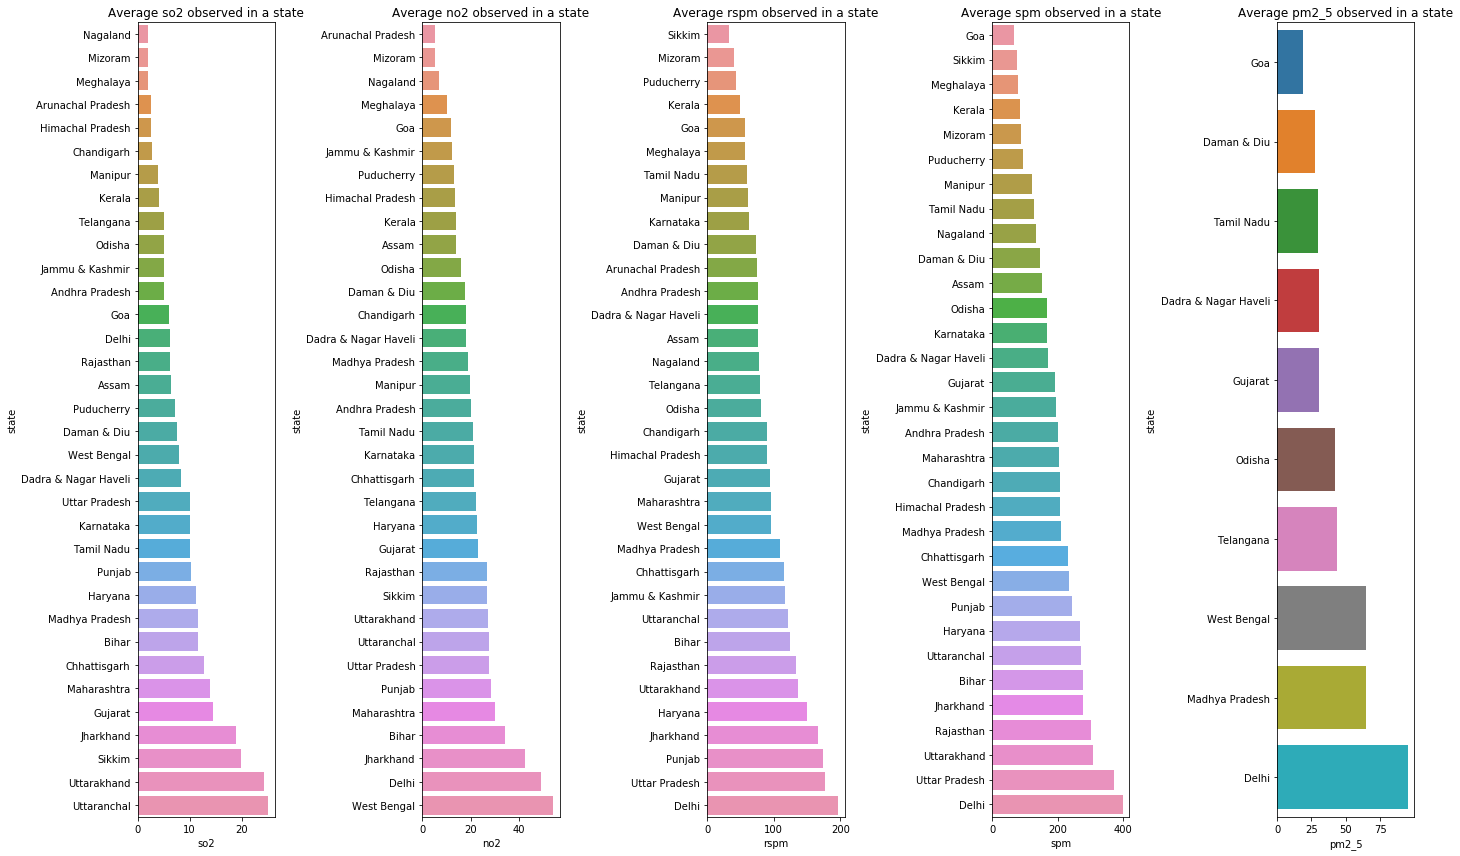

In [81]:
fig, axes= plt.subplots(figsize=(20, 12), ncols=5)
state_wise_max_so2 = df[['state','so2']].dropna().groupby('state').median().sort_values(by='so2')
state_wise_max_no2 = df[['state','no2']].dropna().groupby('state').median().sort_values(by='no2')
state_wise_max_rspm = df[['state','rspm']].dropna().groupby('state').median().sort_values(by='rspm')
state_wise_max_spm = df[['state','spm']].dropna().groupby('state').median().sort_values(by='spm')
state_wise_max_pm2_5 = df[['state','pm2_5']].dropna().groupby('state').median().sort_values(by='pm2_5')

sns.barplot(x='so2', y=state_wise_max_so2.index, data=state_wise_max_so2, ax=axes[0])
axes[0].set_title("Average so2 observed in a state")

sns.barplot(x='no2', y=state_wise_max_no2.index, data=state_wise_max_no2, ax=axes[1])
axes[1].set_title("Average no2 observed in a state")

sns.barplot(x='rspm', y=state_wise_max_rspm.index, data=state_wise_max_rspm, ax=axes[2])
axes[2].set_title("Average rspm observed in a state")

sns.barplot(x='spm', y=state_wise_max_spm.index, data=state_wise_max_spm, ax=axes[3])
axes[3].set_title("Average spm observed in a state")

sns.barplot(x='pm2_5', y=state_wise_max_pm2_5.index, data=state_wise_max_pm2_5, ax=axes[4])
axes[4].set_title("Average pm2_5 observed in a state")
plt.tight_layout()

In [82]:
df.head()

,state,location,type,so2,no2,rspm,spm,pm2_5,date,pollution
0,Andhra Pradesh,Hyderabad,"Residential, Rural and other Areas",4.8,17.4,78.182824,200.260378,NaN,1990-02-01,48.260941
1,Andhra Pradesh,Hyderabad,Industrial Area,3.1,7.0,78.182824,200.260378,NaN,1990-02-01,36.160941
2,Andhra Pradesh,Hyderabad,"Residential, Rural and other Areas",6.2,28.5,78.182824,200.260378,NaN,1990-02-01,60.760941
3,Andhra Pradesh,Hyderabad,"Residential, Rural and other Areas",6.3,14.7,78.182824,200.260378,NaN,1990-03-01,47.060941
4,Andhra Pradesh,Hyderabad,Industrial Area,4.7,7.5,78.182824,200.260378,NaN,1990-03-01,38.260941


In [83]:
df[['type1', 'type2']] = df['type'].str.split(',', 1, expand=True)
df.head()

,state,location,type,so2,no2,rspm,spm,pm2_5,date,pollution,type1,type2
0,Andhra Pradesh,Hyderabad,"Residential, Rural and other Areas",4.8,17.4,78.182824,200.260378,NaN,1990-02-01,48.260941,Residential,Rural and other Areas
1,Andhra Pradesh,Hyderabad,Industrial Area,3.1,7.0,78.182824,200.260378,NaN,1990-02-01,36.160941,Industrial Area,None
2,Andhra Pradesh,Hyderabad,"Residential, Rural and other Areas",6.2,28.5,78.182824,200.260378,NaN,1990-02-01,60.760941,Residential,Rural and other Areas
3,Andhra Pradesh,Hyderabad,"Residential, Rural and other Areas",6.3,14.7,78.182824,200.260378,NaN,1990-03-01,47.060941,Residential,Rural and other Areas
4,Andhra Pradesh,Hyderabad,Industrial Area,4.7,7.5,78.182824,200.260378,NaN,1990-03-01,38.260941,Industrial Area,None


## LOCATION AND TYPE WISE POLLUTION ANALYSIS

In [84]:
df[['type1','pollution']].groupby(['type1']).agg('mean').sort_values('pollution',ascending=False).head()

,pollution
type1,
Industrial,100.286753
Industrial Areas,83.490688
Industrial Area,82.380031
Sensitive,80.389757
RIRUO,77.231595


In [85]:
df[['location','type1','so2']].groupby(['location','type1']).agg('mean').sort_values('so2',ascending=False).head(10)

,,so2
location,type1,
Nanded,Industrial Area,62.036256
Pondichery,Industrial Area,55.332769
Jamshedpur,Residential,50.099305
Gajroula,Industrial Area,46.370382
Faridabad,Industrial,45.550000
Byrnihat,Industrial Area,45.475065
Khurja,Industrial Areas,40.715153
Howrah,Industrial,39.714894
Calcutta,Industrial Area,38.467200


In [86]:
df[['location','type1','no2']].groupby(['location','type1']).agg('mean').sort_values('no2',ascending=False).head(10)

no2
location      type1                            
Howrah        Industrial Area         91.616617
              Industrial Areas        85.767668
Kolkata       Industrial Area         73.306098
Howrah        Industrial              69.389362
              Residential and others  67.164018
Kota          Industrial              66.615370
Kolkata       Industrial Areas        65.863124
Durgapur (WB) Industrial Areas        64.454476
Badlapur      Industrial Area         64.451282
Dombivli      Industrial Area         62.650020

In [87]:
df[(df['type1'] != 'RIRUO') | (df['type1'] != 'Rural and other Areas')][['location','type1',
                                                                         'pollution']].groupby(['location','type1']).agg('mean').sort_values('pollution',ascending=False).head(3)

,,pollution
location,type1,
Nanded,Industrial Area,165.943703
Raipur,Industrial Area,161.315500
Howrah,Industrial Area,161.097374


In [88]:
df[(df['type1'] == 'RIRUO') | (df['type1'] == 'Rural and other Areas')][['location','type1',
                                                                         'pollution']].groupby(['location','type1']).agg('mean').sort_values('pollution',ascending=False).head(3)

,,pollution
location,type1,
HALDIA,RIRUO,120.185897
DANKUNI,RIRUO,100.964401
ULUBERIA,RIRUO,99.541667


## PUNE LOCATION RSPM DISTRIBUTION OVER TIME

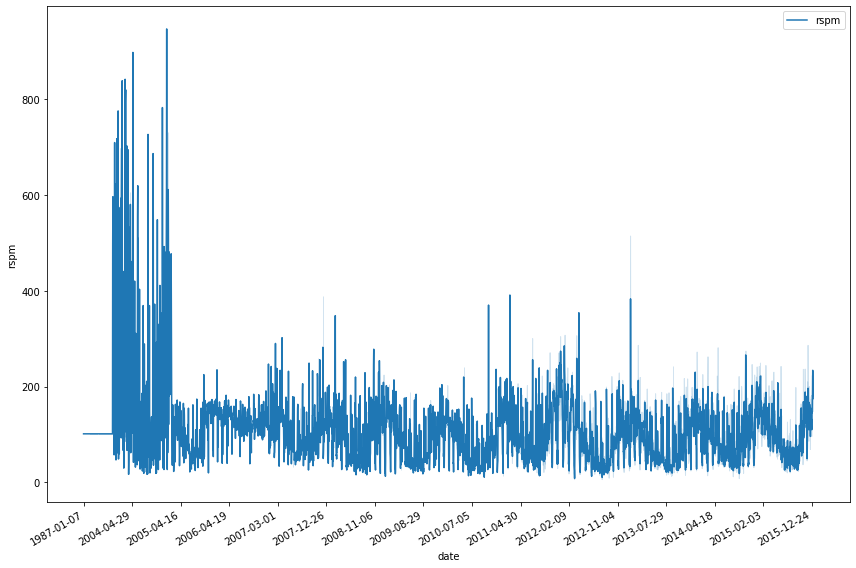

In [89]:
rspm_data = df[df['location']=="Pune"][['date', 'rspm']].dropna()
fig, ax = plt.subplots(figsize=(12,8))
ax.xaxis.set_major_locator(plt.MaxNLocator(20))
sns.lineplot(x='date', y='rspm', data=rspm_data, axes=ax, label="rspm")
fig.autofmt_xdate()
plt.tight_layout()


## CALCULATE AIR QUALITY INDEX FOR SO2 BASED ON FORMULA

The air quality index is a piecewise linear function of the pollutant concentration. At the boundary between AQI categories, there is a discontinuous jump of one AQI unit. To convert from concentration to AQI this equation is used$$\begin{equation*}
I = I_{low} +  \frac{I_{high}-I_{low}}{C_{high}-C_{low}}{(C-C_{low})}
\end{equation*}$$

In [90]:
def cal_SOi(so2):
    si=0
    if (so2<=40):
     si= so2*(50/40)
    elif (so2>40 and so2<=80):
     si= 50+(so2-40)*(50/40)
    elif (so2>80 and so2<=380):
     si= 100+(so2-80)*(100/300)
    elif (so2>380 and so2<=800):
     si= 200+(so2-380)*(100/420)
    elif (so2>800 and so2<=1600):
     si= 300+(so2-800)*(100/800)
    elif (so2>1600):
     si= 400+(so2-1600)*(100/800)
    return si
data['SOi']=data['so2'].apply(cal_SOi)
df= data[['so2','SOi']]
df.head()

,so2,SOi
0,4.8,6.000
1,3.1,3.875
2,6.2,7.750
3,6.3,7.875
4,4.7,5.875


In [91]:
def cal_Noi(no2):
    ni=0
    if(no2<=40):
     ni= no2*50/40
    elif(no2>40 and no2<=80):
     ni= 50+(no2-40)*(50/40)
    elif(no2>80 and no2<=180):
     ni= 100+(no2-80)*(100/100)
    elif(no2>180 and no2<=280):
     ni= 200+(no2-180)*(100/100)
    elif(no2>280 and no2<=400):
     ni= 300+(no2-280)*(100/120)
    else:
     ni= 400+(no2-400)*(100/120)
    return ni
data['Noi']=data['no2'].apply(cal_Noi)
df= data[['no2','Noi']]
df.head()

,no2,Noi
0,17.4,21.750
1,7.0,8.750
2,28.5,35.625
3,14.7,18.375
4,7.5,9.375


In [92]:
def cal_RSPMi(rspm):
    rpi=0
    if(rspm<=100):
     rpi = rspm
    elif(rspm>=101 and rspm<=150):
     rpi= 101+(rspm-101)*((200-101)/(150-101))
    elif(rspm>=151 and rspm<=350):
     ni= 201+(rspm-151)*((300-201)/(350-151))
    elif(rspm>=351 and rspm<=420):
     ni= 301+(rspm-351)*((400-301)/(420-351))
    elif(rspm>420):
     ni= 401+(rspm-420)*((500-401)/(420-351))
    return rpi
data['RSPMi']=data['rspm'].apply(cal_RSPMi)
df= data[['rspm','RSPMi']]
df.head()

,rspm,RSPMi
0,78.182824,78.182824
1,78.182824,78.182824
2,78.182824,78.182824
3,78.182824,78.182824
4,78.182824,78.182824


In [93]:
df.tail()

,rspm,RSPMi
435737,143.0,185.857143
435738,171.0,0.000000
435739,NaN,0.000000
435740,NaN,0.000000
435741,NaN,0.000000


In [94]:
def cal_SPMi(spm):
    spi=0
    if(spm<=50):
     spi=spm*50/50
    elif(spm>50 and spm<=100):
     spi=50+(spm-50)*(50/50)
    elif(spm>100 and spm<=250):
     spi= 100+(spm-100)*(100/150)
    elif(spm>250 and spm<=350):
     spi=200+(spm-250)*(100/100)
    elif(spm>350 and spm<=430):
     spi=300+(spm-350)*(100/80)
    else:
     spi=400+(spm-430)*(100/430)
    return spi
   
data['SPMi']=data['spm'].apply(cal_SPMi)
df= data[['spm','SPMi']]
df.head()

,spm,SPMi
0,200.260378,166.840252
1,200.260378,166.840252
2,200.260378,166.840252
3,200.260378,166.840252
4,200.260378,166.840252


In [95]:
def cal_pmi(pm2_5):
    pmi=0
    if(pm2_5<=50):
     pmi=pm2_5*(50/50)
    elif(pm2_5>50 and pm2_5<=100):
     pmi=50+(pm2_5-50)*(50/50)
    elif(pm2_5>100 and pm2_5<=250):
     pmi= 100+(pm2_5-100)*(100/150)
    elif(pm2_5>250 and pm2_5<=350):
     pmi=200+(pm2_5-250)*(100/100)
    elif(pm2_5>350 and pm2_5<=450):
     pmi=300+(pm2_5-350)*(100/100)
    else:
     pmi=400+(pm2_5-430)*(100/80)
    return pmi
data['PMi']=data['pm2_5'].apply(cal_pmi)
df= data[['pm2_5','PMi']]
df.head()

,pm2_5,PMi
0,NaN,NaN
1,NaN,NaN
2,NaN,NaN
3,NaN,NaN
4,NaN,NaN


In [96]:
type(data['PMi'])

pandas.core.series.Series

## AIR QUALITY INDEX CALCULATION

In [97]:
def cal_aqi(si,ni,rspmi,spmi):
    aqi=0
    if(si>ni and si>rspmi and si>spmi):
     aqi=si
    if(ni>si and ni>rspmi and ni>spmi ):
     aqi=ni
    if(rspmi>si and rspmi>ni and rspmi>spmi ):
     aqi=rspmi
    if(spmi>si and spmi>ni and spmi>rspmi):
     aqi=spmi
    return aqi

data['AQI']=data.apply(lambda x:cal_aqi(x['SOi'],x['Noi'],x['RSPMi'],x['SPMi']),axis=1)
df= data[['state','SOi','Noi','RSPMi','SPMi','AQI']]
df.head()

,state,SOi,Noi,RSPMi,SPMi,AQI
0,Andhra Pradesh,6.000,21.750,78.182824,166.840252,166.840252
1,Andhra Pradesh,3.875,8.750,78.182824,166.840252,166.840252
2,Andhra Pradesh,7.750,35.625,78.182824,166.840252,166.840252
3,Andhra Pradesh,7.875,18.375,78.182824,166.840252,166.840252
4,Andhra Pradesh,5.875,9.375,78.182824,166.840252,166.840252


In [98]:
data.head()

,state,location,type,so2,no2,rspm,spm,pm2_5,date,SOi,Noi,RSPMi,SPMi,PMi,AQI
0,Andhra Pradesh,Hyderabad,"Residential, Rural and other Areas",4.8,17.4,78.182824,200.260378,NaN,1990-02-01,6.000,21.750,78.182824,166.840252,NaN,166.840252
1,Andhra Pradesh,Hyderabad,Industrial Area,3.1,7.0,78.182824,200.260378,NaN,1990-02-01,3.875,8.750,78.182824,166.840252,NaN,166.840252
2,Andhra Pradesh,Hyderabad,"Residential, Rural and other Areas",6.2,28.5,78.182824,200.260378,NaN,1990-02-01,7.750,35.625,78.182824,166.840252,NaN,166.840252
3,Andhra Pradesh,Hyderabad,"Residential, Rural and other Areas",6.3,14.7,78.182824,200.260378,NaN,1990-03-01,7.875,18.375,78.182824,166.840252,NaN,166.840252
4,Andhra Pradesh,Hyderabad,Industrial Area,4.7,7.5,78.182824,200.260378,NaN,1990-03-01,5.875,9.375,78.182824,166.840252,NaN,166.840252


## AIR QUALITY INDEX CLASSIFICATION 

In [99]:
def AQI_Range(x):
    if x<=50:
        return "Good"
    elif x>50 and x<=100:
        return "Moderate"
    elif x>100 and x<=200:
        return "Poor"
    elif x>200 and x<=300:
        return "Unhealthy"
    elif x>300 and x<=400:
        return "Very unhealthy"
    elif x>400:
        return "Hazardous"

data['AQI_Range'] = data['AQI'] .apply(AQI_Range)
data.head()

,state,location,type,so2,no2,rspm,spm,pm2_5,date,SOi,Noi,RSPMi,SPMi,PMi,AQI,AQI_Range
0,Andhra Pradesh,Hyderabad,"Residential, Rural and other Areas",4.8,17.4,78.182824,200.260378,NaN,1990-02-01,6.000,21.750,78.182824,166.840252,NaN,166.840252,Poor
1,Andhra Pradesh,Hyderabad,Industrial Area,3.1,7.0,78.182824,200.260378,NaN,1990-02-01,3.875,8.750,78.182824,166.840252,NaN,166.840252,Poor
2,Andhra Pradesh,Hyderabad,"Residential, Rural and other Areas",6.2,28.5,78.182824,200.260378,NaN,1990-02-01,7.750,35.625,78.182824,166.840252,NaN,166.840252,Poor
3,Andhra Pradesh,Hyderabad,"Residential, Rural and other Areas",6.3,14.7,78.182824,200.260378,NaN,1990-03-01,7.875,18.375,78.182824,166.840252,NaN,166.840252,Poor
4,Andhra Pradesh,Hyderabad,Industrial Area,4.7,7.5,78.182824,200.260378,NaN,1990-03-01,5.875,9.375,78.182824,166.840252,NaN,166.840252,Poor


In [100]:
d=data #saving data in new value
d.head()

,state,location,type,so2,no2,rspm,spm,pm2_5,date,SOi,Noi,RSPMi,SPMi,PMi,AQI,AQI_Range
0,Andhra Pradesh,Hyderabad,"Residential, Rural and other Areas",4.8,17.4,78.182824,200.260378,NaN,1990-02-01,6.000,21.750,78.182824,166.840252,NaN,166.840252,Poor
1,Andhra Pradesh,Hyderabad,Industrial Area,3.1,7.0,78.182824,200.260378,NaN,1990-02-01,3.875,8.750,78.182824,166.840252,NaN,166.840252,Poor
2,Andhra Pradesh,Hyderabad,"Residential, Rural and other Areas",6.2,28.5,78.182824,200.260378,NaN,1990-02-01,7.750,35.625,78.182824,166.840252,NaN,166.840252,Poor
3,Andhra Pradesh,Hyderabad,"Residential, Rural and other Areas",6.3,14.7,78.182824,200.260378,NaN,1990-03-01,7.875,18.375,78.182824,166.840252,NaN,166.840252,Poor
4,Andhra Pradesh,Hyderabad,Industrial Area,4.7,7.5,78.182824,200.260378,NaN,1990-03-01,5.875,9.375,78.182824,166.840252,NaN,166.840252,Poor


In [101]:
data=data.dropna(subset=['spm']) #spm

In [102]:
data=data.dropna(subset=['pm2_5'])

In [103]:
data.isna().sum() 

state           0
location        0
type         1925
so2             0
no2             0
rspm            0
spm             0
pm2_5           0
date            1
SOi             0
Noi             0
RSPMi           0
SPMi            0
PMi             0
AQI             0
AQI_Range       0
dtype: int64

In [104]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_log_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [105]:
X = data[['SOi','Noi','RSPMi','SPMi']]
y = data['AQI']
y.head()

64445    76.53653
64446    76.53653
64447    76.53653
64448    76.53653
64449    76.53653
Name: AQI, dtype: float64

In [106]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2,random_state=101)

In [107]:

X_train.head()

,SOi,Noi,RSPMi,SPMi
360028,3.750,40.000,51.000000,117.819376
434684,2.500,46.250,87.000000,189.004349
64493,13.250,23.375,115.142857,210.000000
433906,5.000,55.000,115.142857,189.004349
183595,34.375,26.000,91.000000,106.000000


In [108]:

LR = LinearRegression() 
LR.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [109]:
print('Intercept',LR.intercept_)

Intercept 4.168841608262937


In [110]:
print('Coefficients',LR.coef_)

Coefficients [0.02669704 0.06811693 0.05053633 0.9544088 ]


In [111]:
predictions = LR.predict(X_test)

Text(0, 0.5, 'Predicted Y')

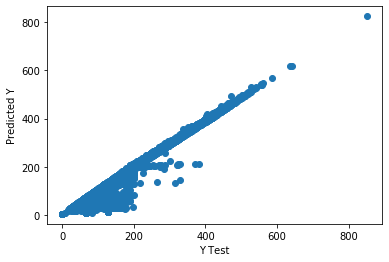

In [112]:
plt.scatter(y_test,predictions)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')


In [113]:
LR.score(X_test,y_test)

0.9791014082309275

In [114]:
LR.predict([[4.8,21.75,78.18,100]])

array([105.17034145])

In [115]:
LR.predict([[5.2,7.625,76.53,75.0]])

array([80.27526359])

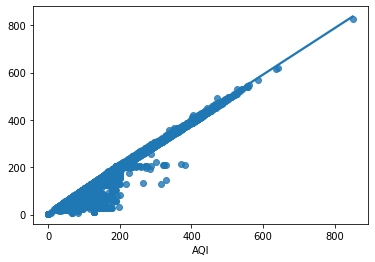

In [116]:
sns.regplot(y_test,predictions)

In [117]:
print('R^2_Square:%.2f '% r2_score(y_test, predictions))
print('MSE:%.2f '% np.sqrt(mean_squared_error(y_test, predictions)))


R^2_Square:0.98 
MSE:12.58 


In [118]:
X1= data[['so2','no2','rspm','spm']]
y1 = data['AQI']
y.tail()

435734    195.959184
435735    189.004349
435736    189.004349
435737    189.004349
435738    189.004349
Name: AQI, dtype: float64

In [119]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(X1,y1, test_size=0.2,random_state=101)

In [120]:

X_train1.head()


,so2,no2,rspm,spm
360028,3.0,32.0,51.0,126.729064
434684,2.0,37.0,87.0,233.506524
64493,10.6,18.7,108.0,260.000000
433906,4.0,44.0,108.0,233.506524
183595,27.5,20.8,91.0,109.000000


In [121]:
LR1 = LinearRegression()
LR1.fit(X_train1, y_train1)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [122]:
prediction1 = LR1.predict(X_test1)


Text(0, 0.5, 'Predicted Y')

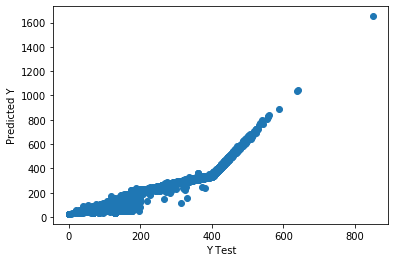

In [123]:
plt.scatter(y_test1,prediction1) #scatter plot for actual and predicted values
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

In [124]:
LR1.predict([[9.1,16.3,67,179]])

array([154.79655317])

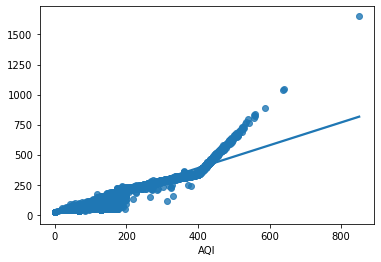

In [125]:
sns.regplot(y_test1,prediction1) #regression plot

In [126]:

y_test1_np= np.array(y_test1)
prediction1_np = np.array(prediction1)

In [127]:
LR1.score(X_test1,y_test1)

0.9433954748037254

In [128]:
print('R^2_Square:%.2f '% r2_score(y_test1, prediction1))
print('MSE:%.2f '% np.sqrt(mean_squared_error(y_test1, prediction1)))

R^2_Square:0.94 
MSE:20.71 


In [129]:
from sklearn.linear_model import LogisticRegression

In [130]:
X2 = data[['SOi','Noi','RSPMi','SPMi']]
y2 = data['AQI_Range']

In [131]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size=0.33, random_state=42)

In [132]:

logmodel = LogisticRegression()
logmodel.fit(X_train2,y_train2)

C:\Users\ketak\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [133]:
predictions = logmodel.predict(X_test)

In [134]:
logmodel.score(X_test2,y_test2)

0.7013289457030756

In [135]:
new = pd.DataFrame(d)
file1 = 'new1.csv'
new.to_csv(file1,index=True)

In [136]:
d.tail()


,state,location,type,so2,no2,rspm,spm,pm2_5,date,SOi,Noi,RSPMi,SPMi,PMi,AQI,AQI_Range
435737,West Bengal,ULUBERIA,RIRUO,22.0,50.0,143.0,233.506524,64.890625,2015-12-24,27.5,62.5,185.857143,189.004349,64.890625,189.004349,Poor
435738,West Bengal,ULUBERIA,RIRUO,20.0,46.0,171.0,233.506524,64.890625,2015-12-29,25.0,57.5,0.000000,189.004349,64.890625,189.004349,Poor
435739,andaman-and-nicobar-islands,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.000000,NaN,NaN,0.000000,Good
435740,Lakshadweep,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.000000,NaN,NaN,0.000000,Good
435741,Tripura,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.000000,NaN,NaN,0.000000,Good


In [137]:
logmodel.predict([[77.4,147.7,78.182,100]]) #correct

array(['Moderate'], dtype=object)

In [138]:
logmodel.predict([[32.7,35,78.182,203]])

array(['Poor'], dtype=object)

In [139]:
logmodel.predict([[100,182.2,78.182,400]])

array(['Poor'], dtype=object)

In [140]:
X3 = data[['so2','no2','rspm','spm']]
y3 = data['AQI_Range']

In [141]:
X_train3, X_test3, y_train3, y_test3 = train_test_split(X3, y3, test_size=0.33, random_state=42)

In [142]:
logmodel2 = LogisticRegression()
logmodel2.fit(X_train3,y_train3)


C:\Users\ketak\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [143]:
logmodel2.score(X_test3,y_test3) #very low accuracy score

0.6833312238957094

In [144]:

logmodel2.predict([[4.8,17.4,78.48,200]]) #correct

array(['Poor'], dtype=object)

In [145]:
logmodel2.predict([[67.4,127.7,78.48,215]]) #correct

array(['Poor'], dtype=object)

In [146]:
logmodel2.predict([[2.059,8.94,102,256]])

array(['Hazardous'], dtype=object)

In [147]:
from sklearn.ensemble import RandomForestClassifier

In [148]:
model = RandomForestClassifier(n_estimators=10)
model.fit(X_train3,y_train3)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [149]:

model.score(X_test3,y_test3)

0.9997974939881028

In [150]:
X_train3.head()

,so2,no2,rspm,spm
360294,4.000000,24.0,23.000000,126.729064
278096,5.800000,11.1,129.000000,262.000000
277941,2.900000,26.3,72.000000,140.000000
269637,18.300000,28.6,83.619824,155.000000
272765,5.275874,12.7,80.000000,176.000000


In [151]:
model.predict([[2.059,8.94,102,256]])

array(['Unhealthy'], dtype=object)

In [152]:
from sklearn import tree

In [153]:
model2 = tree.DecisionTreeClassifier()

In [154]:
model2.fit(X_train3,y_train3)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [155]:
model2.score(X_test3,y_test3)

0.9997215542336413

In [156]:
model2.predict([[9,31,51,205.25]])

array(['Poor'], dtype=object)

In [157]:

model2.predict([[2,5.8,17,36]])

array(['Good'], dtype=object)

In [158]:
model2.predict([[18.6,48.3,142,285]]) 

array(['Unhealthy'], dtype=object)

In [159]:
model2.predict([[6,11,109,84.41]])

array(['Poor'], dtype=object)

In [160]:
model2.predict([[10,16,156,372.66]])

array(['Very unhealthy'], dtype=object)

## SO2 NO2 DISTRIBUTION OVER PAST YEARS

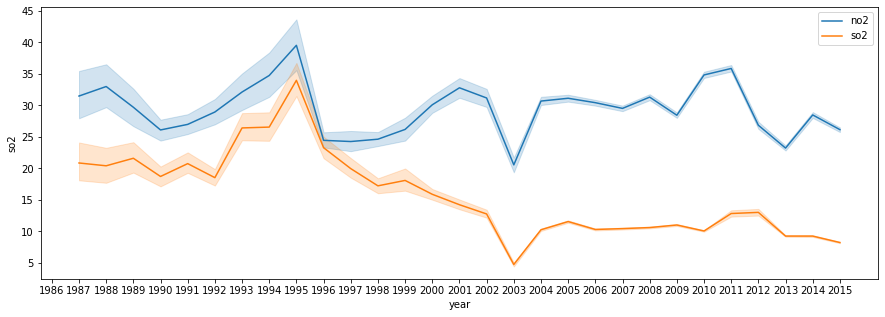

In [195]:
plt.figure(figsize=(15,5))
plt.xticks(np.arange(1980,2016))
sns.lineplot(x='year',y='no2',data=data)
sns.lineplot(x='year',y='so2',data=data)
plt.legend(['no2','so2'])

In [1]:
from IPython.display import IFrame

In [2]:
IFrame('https://public.tableau.com/views/Final_Exam_AssignmentStudent_Id_0748396_15935618099320/Yearly_Avg_So2_No2_90s_decade?::embed=y&:showVizHome=no',width=1000, height=775)

In [163]:
data.head()

,state,location,type,so2,no2,rspm,spm,pm2_5,date,SOi,Noi,RSPMi,SPMi,PMi,AQI,AQI_Range
64445,Dadra & Nagar Haveli,Daman,NaN,5.2,6.1,76.53653,75.0,30.511628,1992-06-01,6.500,7.625,76.53653,75.0,30.511628,76.53653,Moderate
64446,Dadra & Nagar Haveli,Daman,NaN,5.3,6.0,76.53653,70.0,30.511628,1992-07-01,6.625,7.500,76.53653,70.0,30.511628,76.53653,Moderate
64447,Dadra & Nagar Haveli,Daman,NaN,6.2,7.2,76.53653,74.0,30.511628,1992-08-01,7.750,9.000,76.53653,74.0,30.511628,76.53653,Moderate
64448,Dadra & Nagar Haveli,Daman,NaN,4.5,5.9,76.53653,75.0,30.511628,1992-09-01,5.625,7.375,76.53653,75.0,30.511628,76.53653,Moderate
64449,Dadra & Nagar Haveli,Daman,NaN,4.8,6.4,76.53653,71.0,30.511628,1992-10-01,6.000,8.000,76.53653,71.0,30.511628,76.53653,Moderate


## AQI OVER PAST YEARS

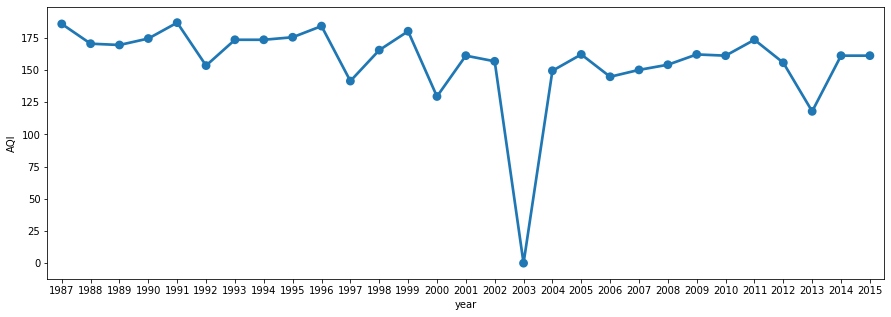

In [179]:
df = data[['AQI','year','state']].groupby(["year"]).median().reset_index().sort_values(by='year',ascending=False)
f,ax=plt.subplots(figsize=(15,5))
sns.pointplot(x='year', y='AQI', data=df)

## ALL PARAMETERS OVER PAST YEARS

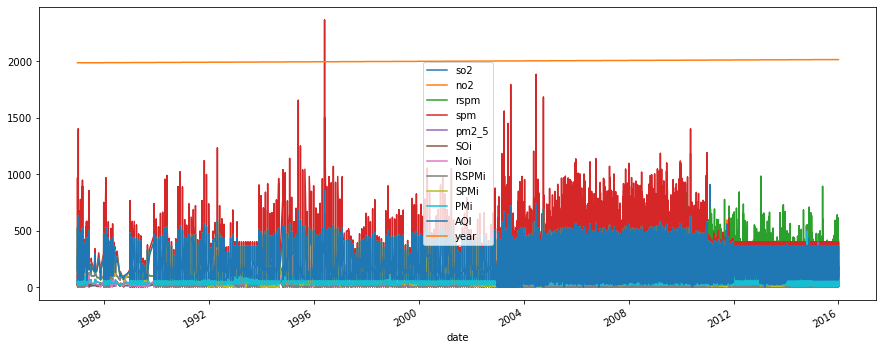

In [165]:
df=data.set_index('date')
df.sort_values(by='date',ascending=False)
df.plot(figsize=(15, 6))
plt.show()
y=df.AQI

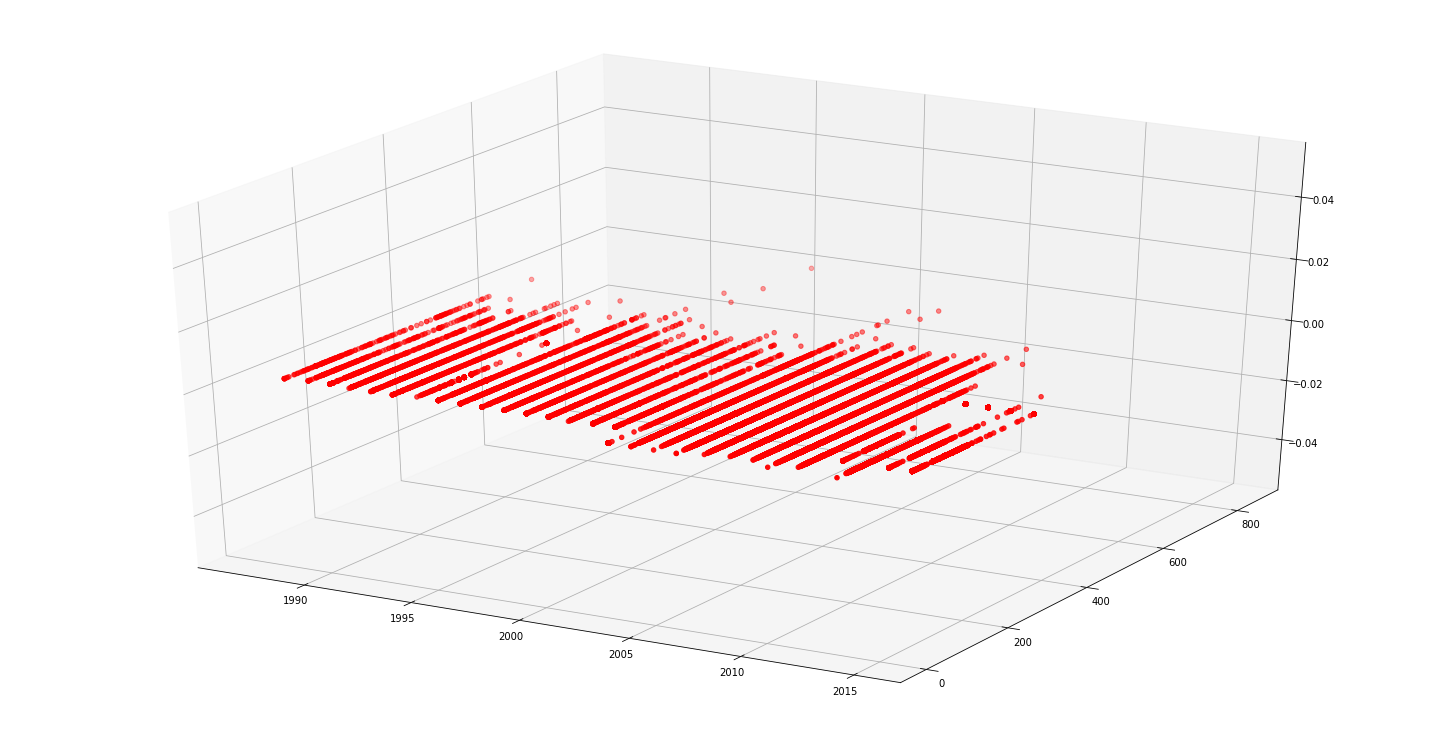

In [176]:
year=df['year'].values
AQI=df['AQI'].values
df['AQI']=pd.to_numeric(df['AQI'],errors='coerce')
df['year']=pd.to_numeric(df['year'],errors='coerce')

import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (20.0, 10.0)
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(year,AQI, color='red')
plt.show()

In [181]:
data.columns

Index(['state', 'location', 'type', 'so2', 'no2', 'rspm', 'spm', 'pm2_5',
       'date', 'SOi', 'Noi', 'RSPMi', 'SPMi', 'PMi', 'AQI', 'AQI_Range',
       'year'],
      dtype='object')

In [187]:
features = data[['so2', 'no2', 'rspm', 'spm', 'pm2_5',
       'SOi', 'Noi', 'RSPMi', 'SPMi', 'PMi', 'AQI', 
       'year']]

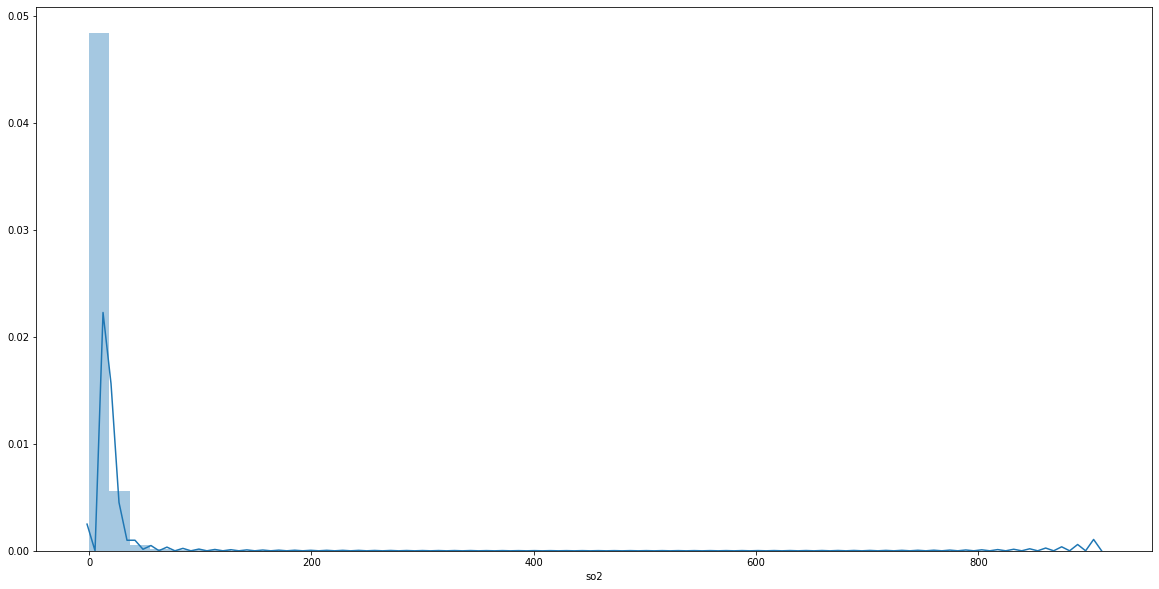

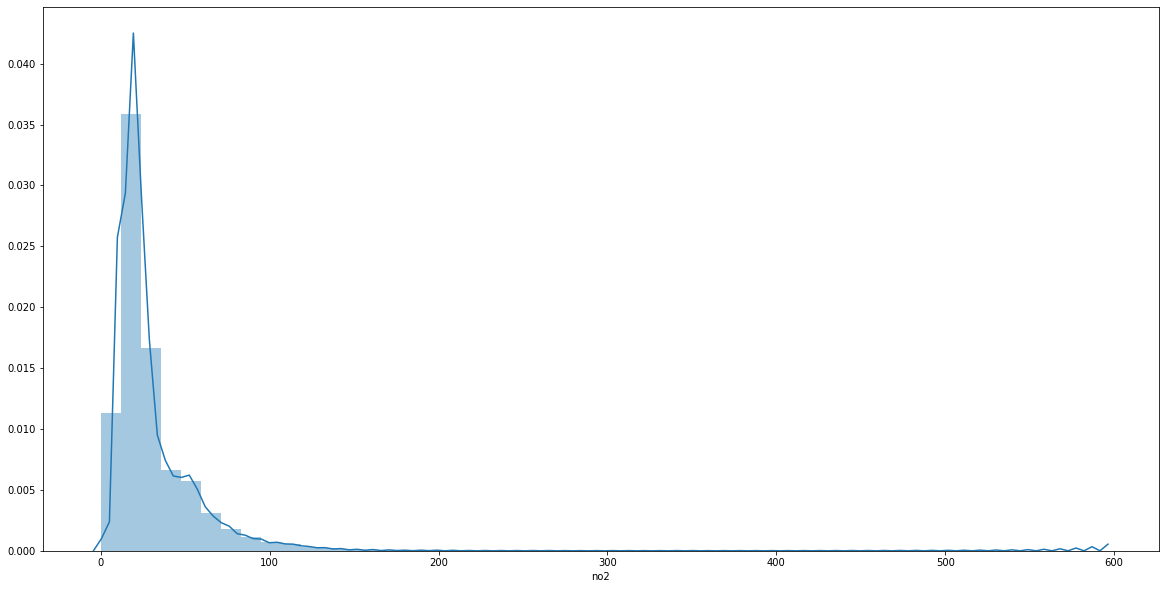

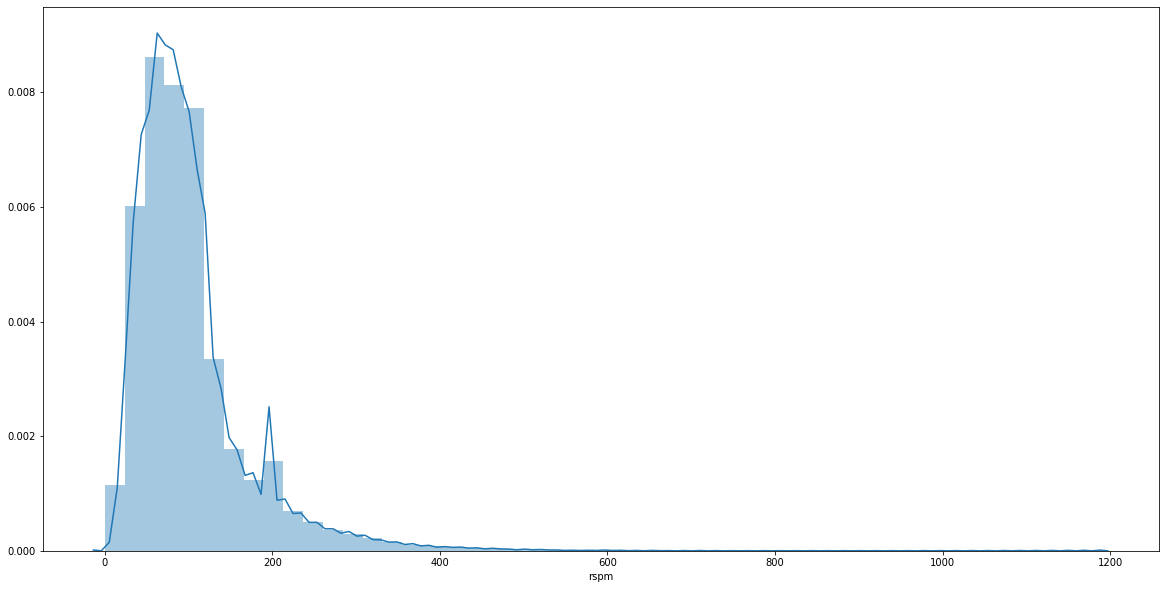

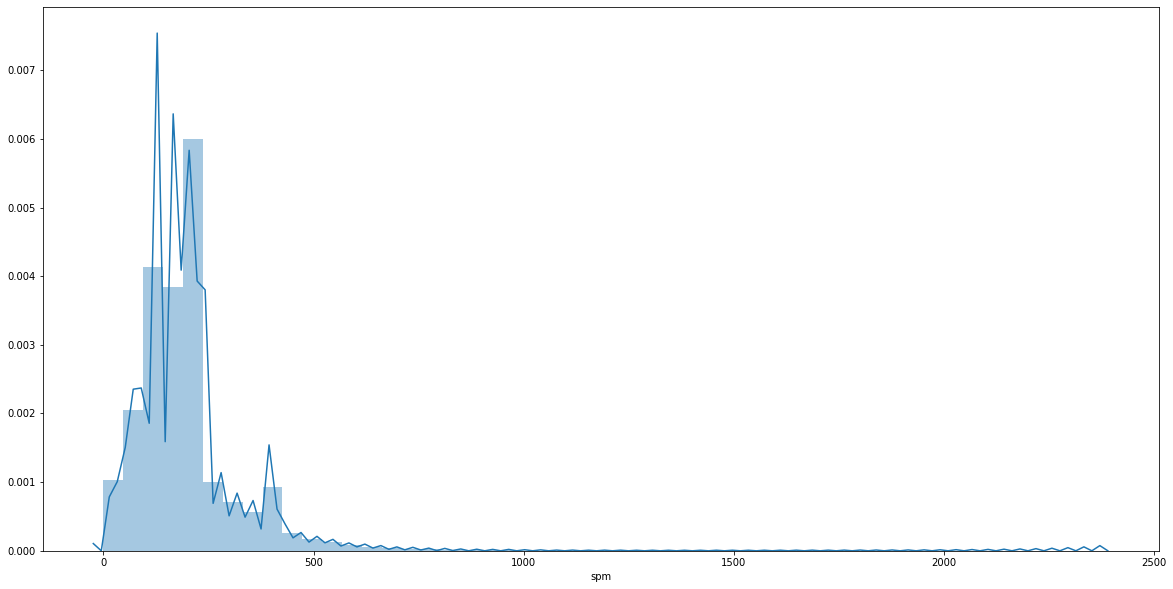

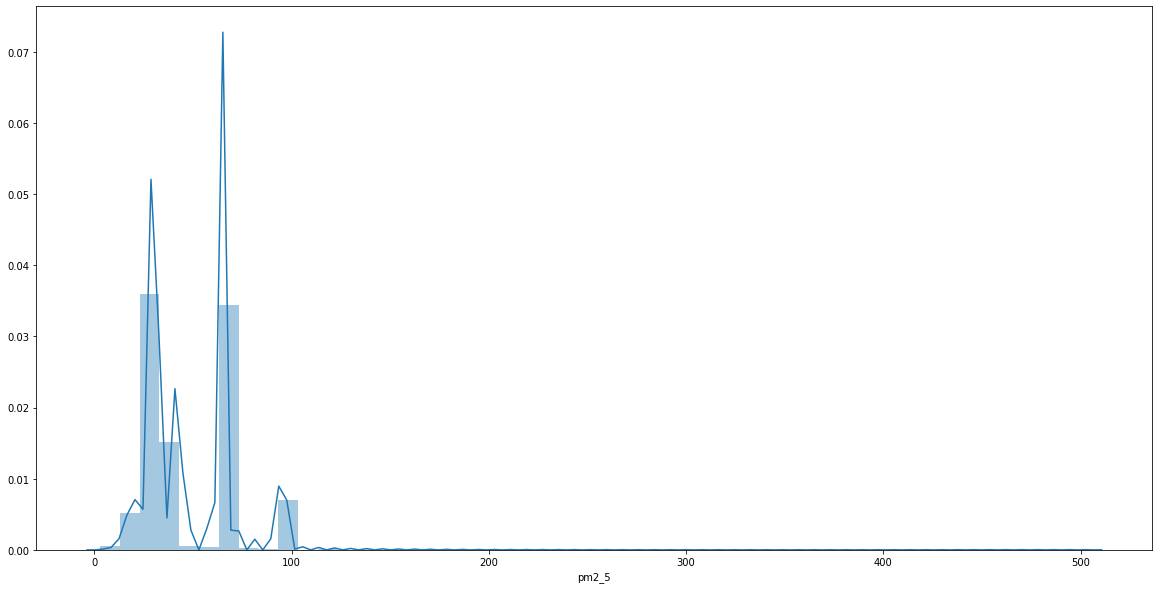

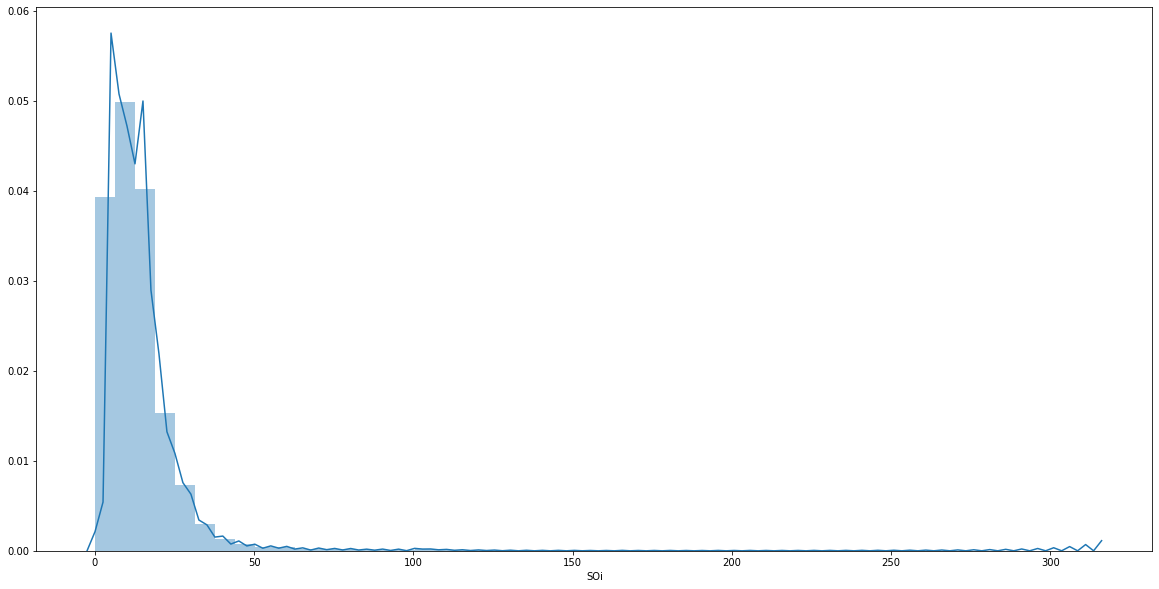

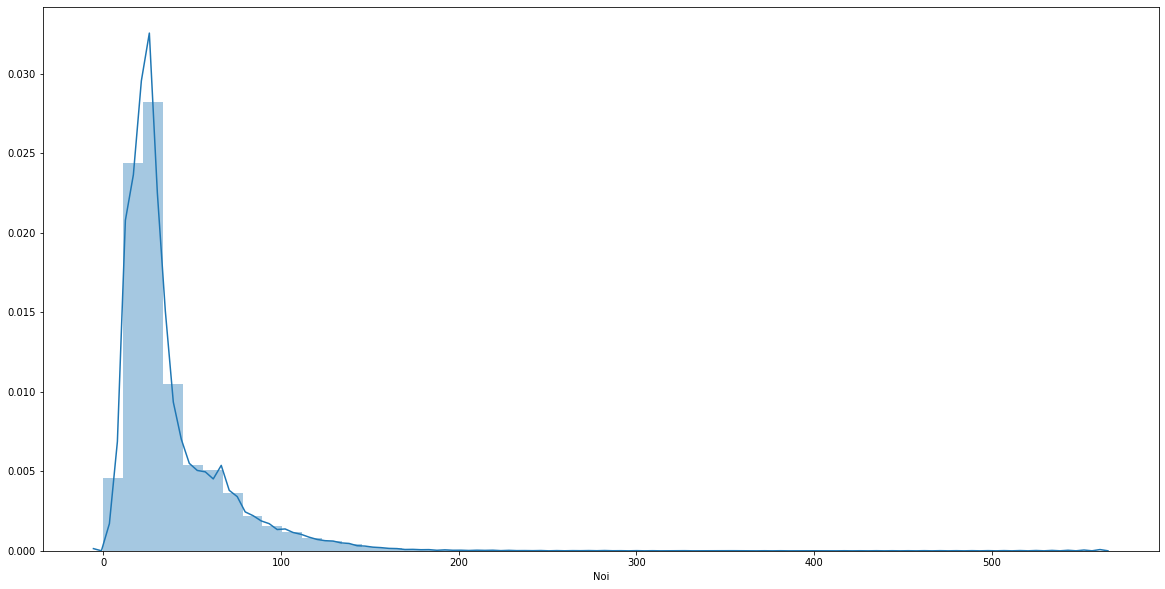

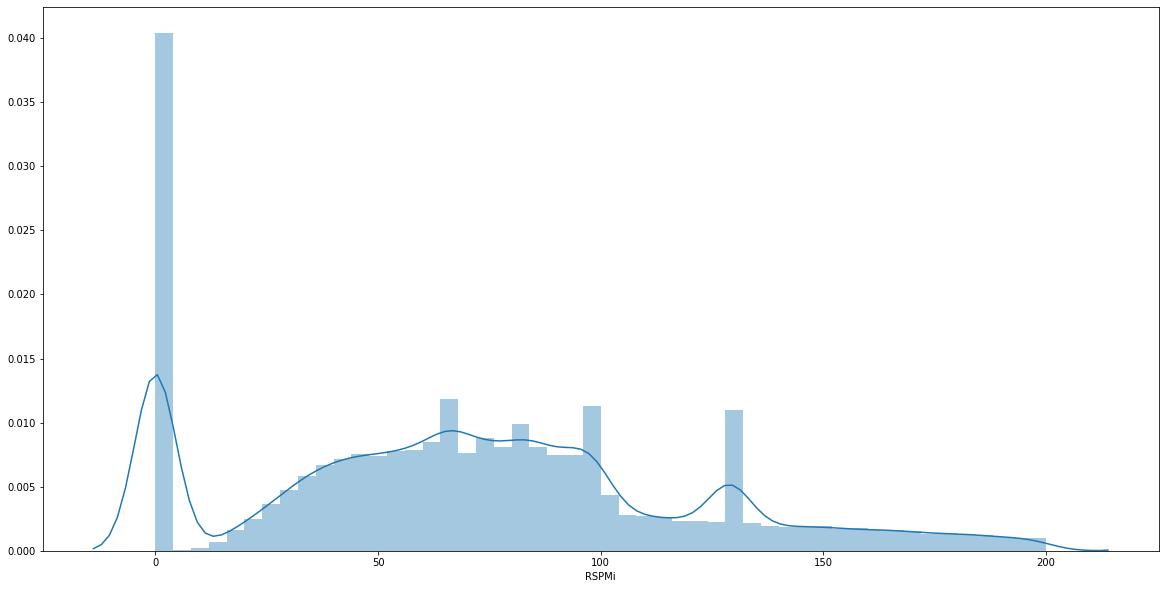

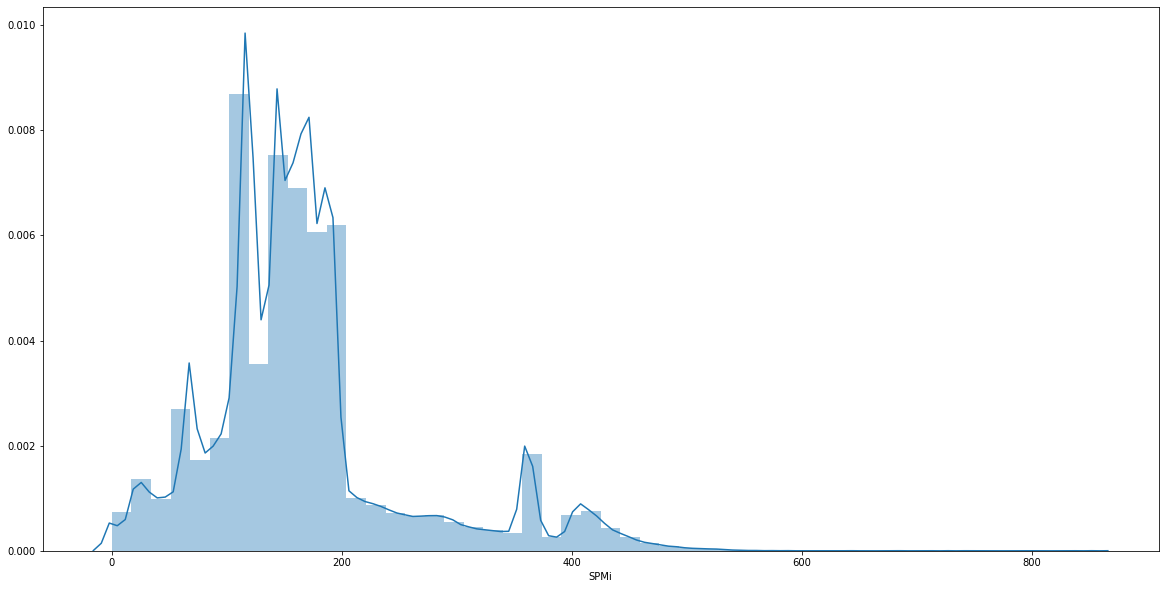

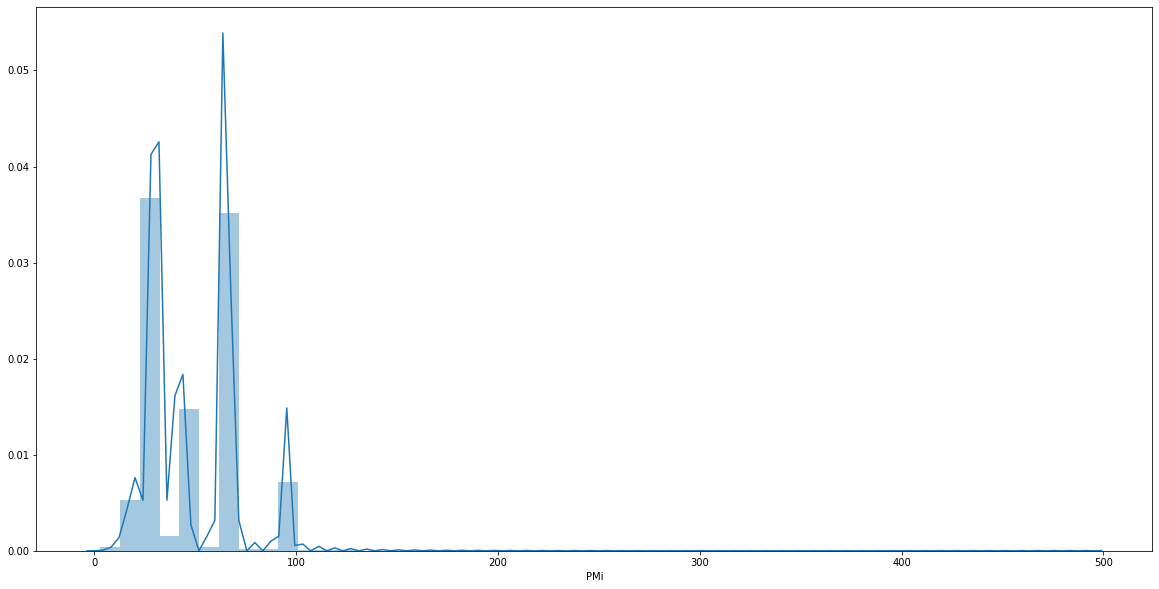

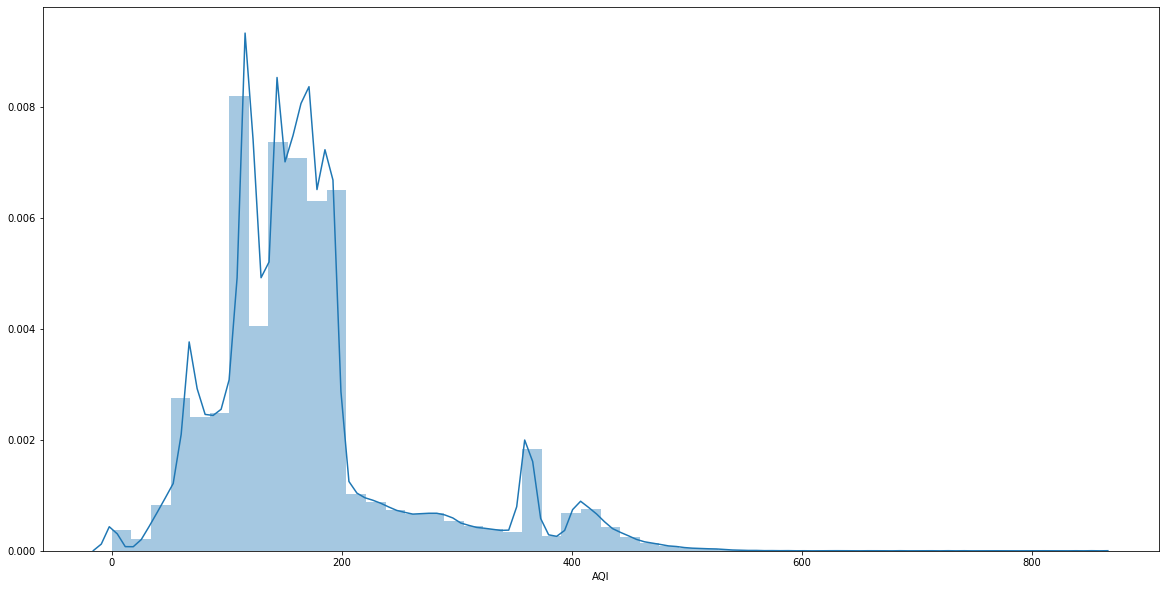

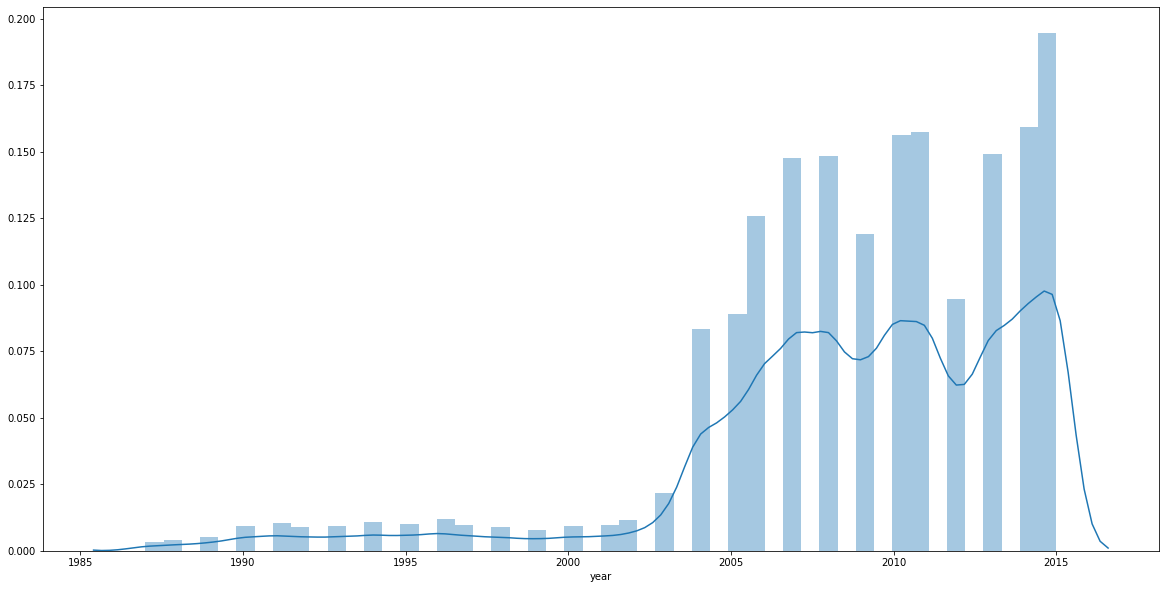

In [188]:
import seaborn as sns
for column in features.columns:
    plt.figure()             
    sns.distplot(data[column])

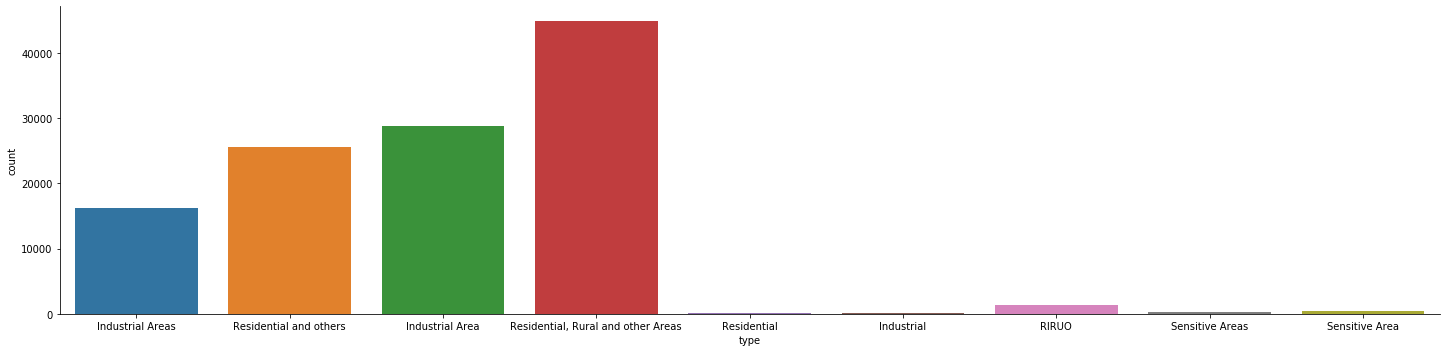

In [192]:
sns.catplot(x = "type", kind = "count",  data = data, height=5, aspect = 4)

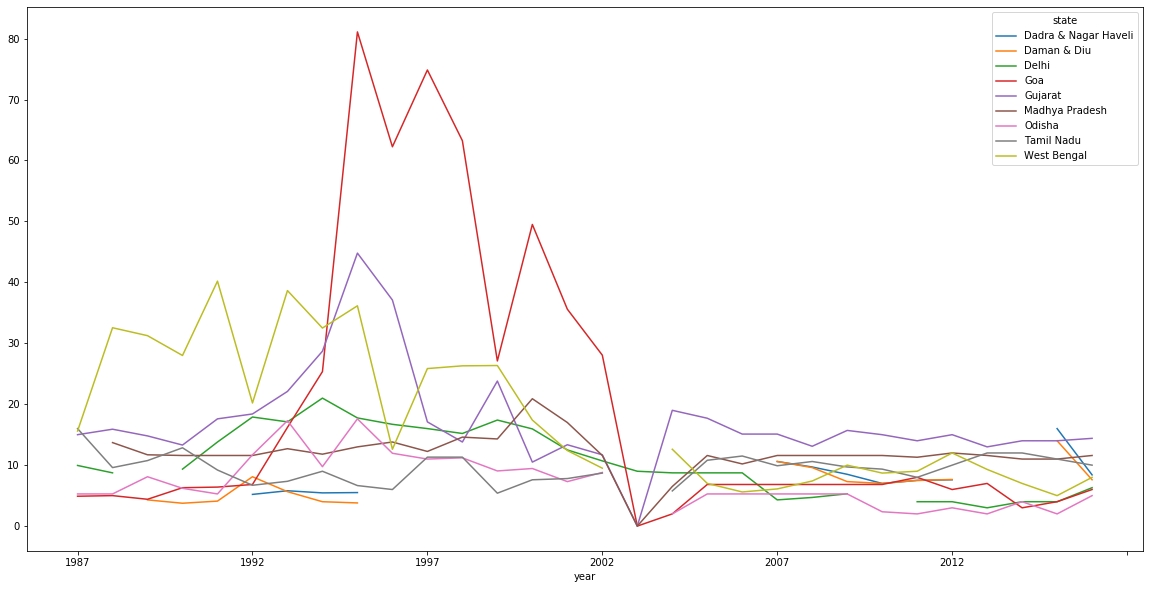

In [193]:
temp = data.pivot_table('so2', index='year',columns=['state'],aggfunc='median',margins=True).reset_index()
temp = temp.drop("All", axis = 1)
temp = temp.set_index("year")
temp.plot(figsize=(20,10))